# HOMEWORK 13

In this homework you are going to build your first classifier for the CIFAR-10 dataset. This dataset contains 10 different classes and you can learn more about it [here](https://www.cs.toronto.edu/~kriz/cifar.html). This homework consists of the following tasks:
* Dataset inspection
* Building the network
* Training
* Evaluation

At the end, as usual, there will be a couple of questions for you to answer :-)

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Input, MaxPooling2D
from tensorflow.keras import Model
from time import time

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

# Set the seeds for reproducibility
from numpy.random import seed
from tensorflow.random import set_seed
seed_value = 1234578790
seed(seed_value)
set_seed(seed_value)

### Step 0: Dataset Inspection

Load the dataset and make a quick inspection.

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 19s 0us/step


/var/folders/g6/6956wzl14cv5d57xywdhm5d80000gp/T/ipykernel_26471/278039419.py:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(classes[int(y_train[idx])])


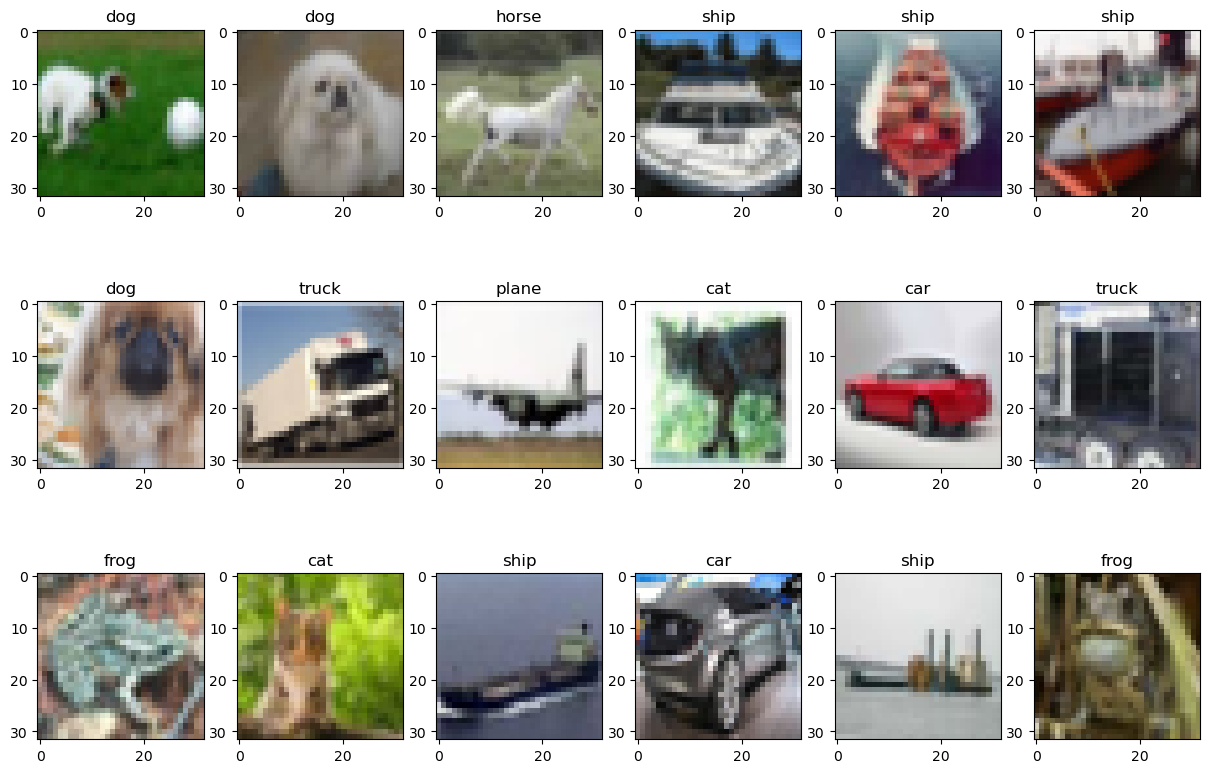

In [6]:
# Load the dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
# Mapping from class ID to class name
classes = {0:'plane', 1:'car', 2:'bird', 3:'cat', 4:'deer',
           5:'dog', 6:'frog', 7:'horse', 8:'ship', 9:'truck'}

# Dataset params
num_classes = len(classes)
size = x_train.shape[1]

# Visualize random samples (as a plot with 3x6 samples)
for ii in range(18):    
    plt.subplot(3,6,ii+1)
    # Pick a random sample
    idx = np.random.randint(0, x_train.shape[0])
    # Show the image and the label
    plt.imshow(x_train[idx, ...])
    plt.title(classes[int(y_train[idx])])
plt.show()

Compute the class histogram (you can visualize it if you want). Is the dataset balanced?

Hint: You might find [Counter](https://docs.python.org/3/library/collections.html#collections.Counter) tool useful. In any case, it's up to you how you compute the histogram.

Counter({6: 5000, 9: 5000, 4: 5000, 1: 5000, 2: 5000, 7: 5000, 8: 5000, 3: 5000, 5: 5000, 0: 5000})


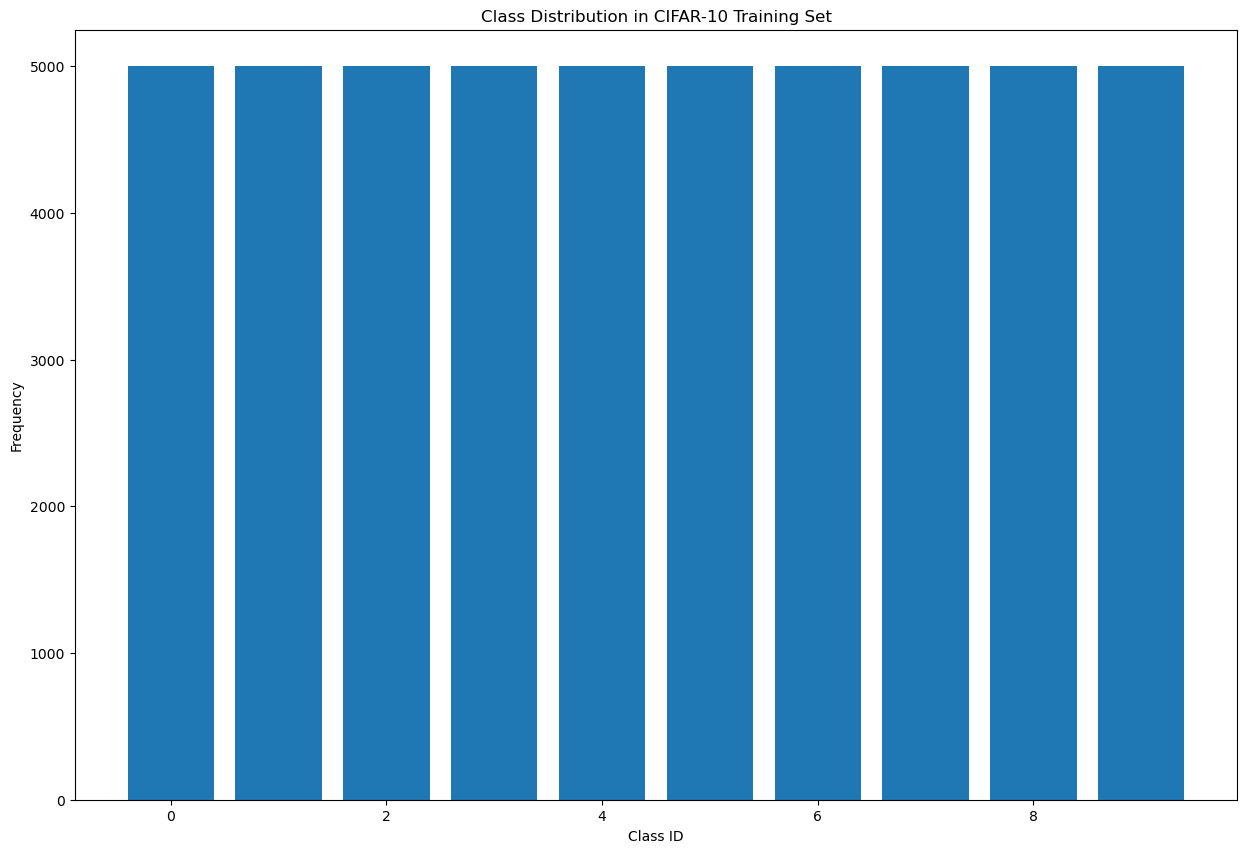

In [8]:
from collections import Counter
hist = Counter(y_train.flatten())
print(hist)

plt.bar(hist.keys(), hist.values())
plt.xlabel('Class ID')
plt.ylabel('Frequency')
plt.title('Class Distribution in CIFAR-10 Training Set')
plt.show()

### Step 1: Data Preparation

In this step, you'll need to prepare the data for training, i.e., you will have to normalize it and encode the labels as one-hot vectors.

In [10]:
# Normalization
x_train = x_train / 255.0
x_test = x_test / 255.0

# One-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

print('Train set:   ', len(y_train), 'samples')
print('Test set:    ', len(y_test), 'samples')
print('Sample dims: ', x_train.shape)

Train set:    50000 samples
Test set:     10000 samples
Sample dims:  (50000, 32, 32, 3)


### Step 2: Building the Classifier

Build the CNN for CIFAR10 classification. For starters, you can use the same network we used in the lesson for the MNIST problem.

In [12]:
# Build the classifier
input_layer = Input(shape=(size, size, 3))
x = Conv2D(32, (3, 3), activation='relu')(input_layer)
x = MaxPooling2D((2, 2))(x)
x = Flatten()(x)
x = Dense(64, activation='relu')(x)
output_layer = Dense(num_classes, activation='softmax')(x)
model = Model(input_layer, output_layer)

# Show the model
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 7200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       460,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 462,410 (1.76 MB)

 Trainable params: 462,410 (1.76 MB)

 Non-trainable params: 0 (0.00 B)

### Step 3: Training

Compile the model and train it.

In [14]:
epochs = 25
batch_size = 128

# Compile the model

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.1)

Epoch 1/25
352/352 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.3181 - loss: 1.9116 - val_accuracy: 0.4968 - val_loss: 1.4574
Epoch 2/25
352/352 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.5090 - loss: 1.3914 - val_accuracy: 0.5406 - val_loss: 1.3156
Epoch 3/25
352/352 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.5649 - loss: 1.2486 - val_accuracy: 0.5824 - val_loss: 1.2102
Epoch 4/25
352/352 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.5944 - loss: 1.1619 - val_accuracy: 0.6064 - val_loss: 1.1403
Epoch 5/25
352/352 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.6172 - loss: 1.1012 - val_accuracy: 0.6198 - val_loss: 1.1017
Epoch 6/25
352/352 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.6323 - loss: 1.0527 - val_accuracy: 0.6262 - val_loss: 1.0748
Epoch 7/25
352/352 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.6485 - loss: 1.0119 - val_accuracy: 0.6328 - val_loss: 1.0591
Epoch 8/25
352/352 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.6609 - loss: 0.9755 - val_accu

Train Acc      0.7800222039222717
Validation Acc 0.6240000128746033


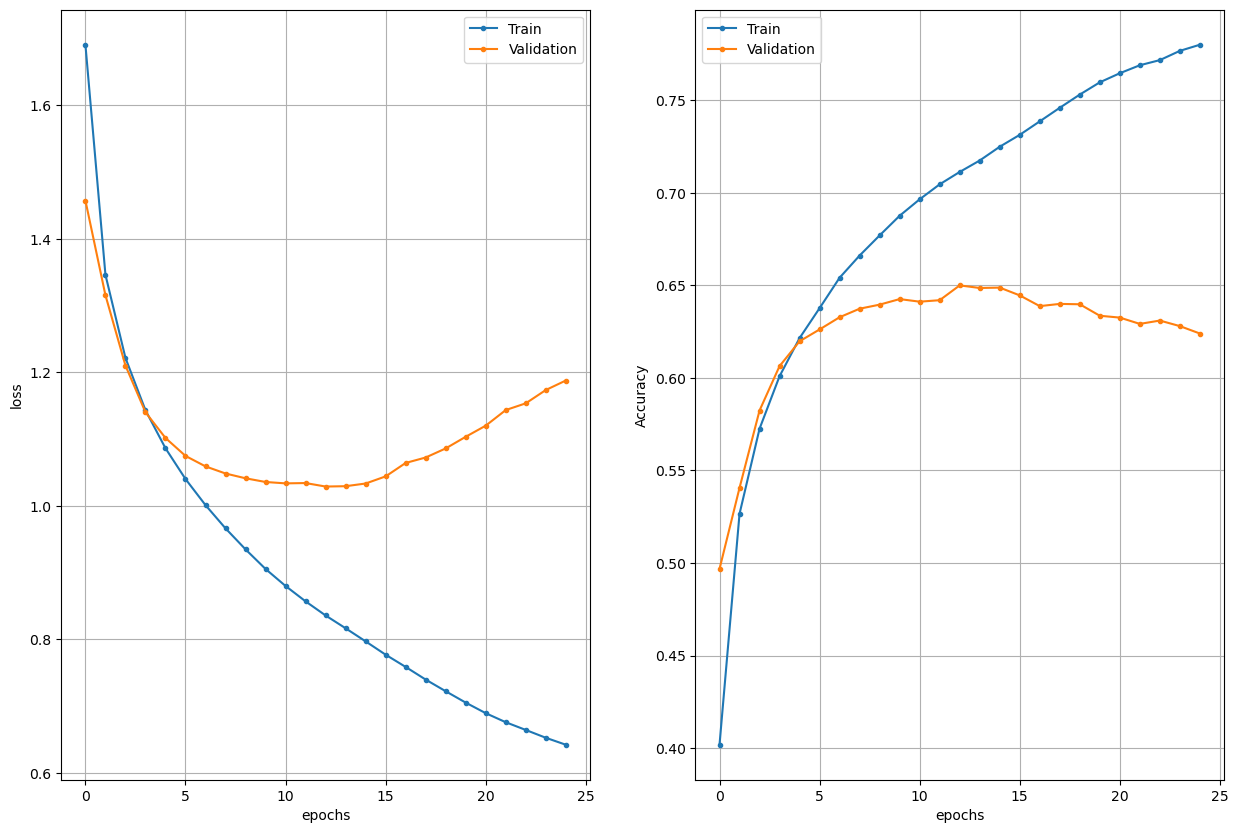

In [16]:
# Show training history (this cell is complete, nothing to implement here :-) )
h = history.history
epochs = range(len(h['loss']))

plt.subplot(121), plt.plot(epochs, h['loss'], '.-', epochs, h['val_loss'], '.-')
plt.grid(True), plt.xlabel('epochs'), plt.ylabel('loss')
plt.legend(['Train', 'Validation'])
plt.subplot(122), plt.plot(epochs, h['accuracy'], '.-',
                           epochs, h['val_accuracy'], '.-')
plt.grid(True), plt.xlabel('epochs'), plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

print('Train Acc     ', h['accuracy'][-1])
print('Validation Acc', h['val_accuracy'][-1])    

### Step 4: Evaluation

In this step, you have to calculate the accuracies and visualize some random samples. For the evaluation, you are going to use the test split from the dataset.

In [18]:
# Compute the labels and the predictions as sparse values
y_true = np.argmax(y_test, axis=1)
y_pred_probs = model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [20]:
# Compute and print the accuracy for each class
for class_id, class_name in classes.items():
    indices = (y_true == class_id)
    acc = np.mean(y_pred[indices] == y_true[indices])
    print(class_name, acc)

plane 0.775
car 0.866
bird 0.451
cat 0.306
deer 0.668
dog 0.445
frog 0.741
horse 0.653
ship 0.688
truck 0.607


In [22]:
# Print the overall stats
ev = model.evaluate(x_test, y_test)
print('Test loss  ', ev[0])
print('Test metric', ev[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6263 - loss: 1.1916
Test loss   1.2160727977752686
Test metric 0.6200000047683716


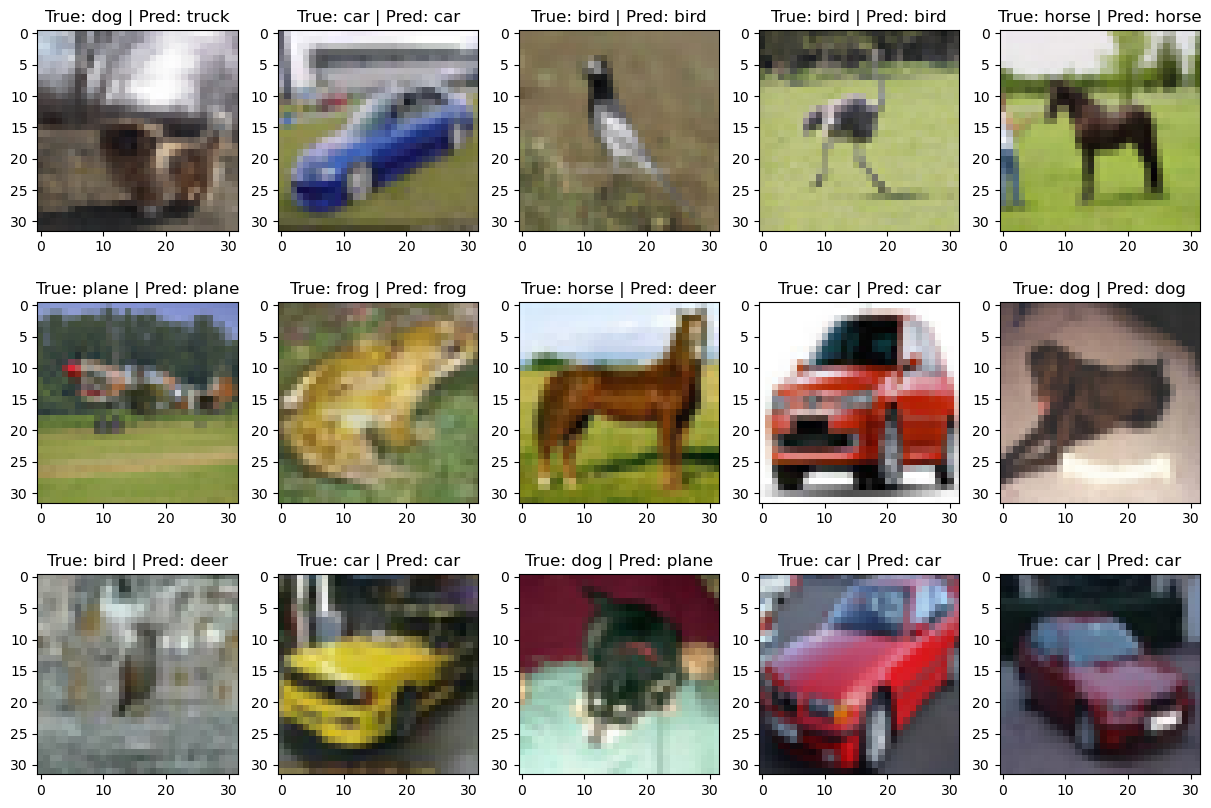

In [24]:
# Show random samples
for ii in range(15):
    # Pick a random sample
    idx = np.random.randint(0, x_test.shape[0])
    # Show the results
    plt.subplot(3,5,ii+1), plt.imshow(x_test[idx, ...])
    plt.title('True: ' + str(classes[y_true[idx]]) + ' | Pred: ' + str(classes[y_pred[idx]]))

### Questions
* What is the overall accuracy of the classifier?
* What modifications would you do in order to improve the classification accuracy?
* Make **one** modification (that you think can help) and train the classifier again. Does the accuracy improve?

1) The model is performing with an accuracy of approximately 62%
2) I would consider implementing data augmentation, batch normalization, adjusting dropout rates
3) For this case I will use batch normalization

In [48]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,)

datagen.fit(x_train)
input_layer = Input(shape=(size, size, 3))
x = Conv2D(32, (3, 3), activation='relu')(input_layer)
x = MaxPooling2D((2, 2))(x)
x = Flatten()(x)
x = Dense(64, activation='relu')(x)
output_layer = Dense(num_classes, activation='softmax')(x)
model = Model(input_layer, output_layer)
model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 7200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │       460,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 462,410 (1.76 MB)

 Trainable params: 462,410 (1.76 MB)

 Non-trainable params: 0 (0.00 B)

In [50]:
epochs = 25
batch_size = 128

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(
    datagen.flow(x_train, y_train, batch_size=batch_size),
    epochs=epochs,
    validation_data=(x_test, y_test),
)

Epoch 1/25
391/391 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - accuracy: 0.3277 - loss: 1.8575 - val_accuracy: 0.4789 - val_loss: 1.4593
Epoch 2/25
391/391 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - accuracy: 0.4724 - loss: 1.4732 - val_accuracy: 0.5376 - val_loss: 1.3222
Epoch 3/25
391/391 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.5157 - loss: 1.3720 - val_accuracy: 0.5508 - val_loss: 1.2512
Epoch 4/25
391/391 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - accuracy: 0.5244 - loss: 1.3303 - val_accuracy: 0.5611 - val_loss: 1.2646
Epoch 5/25
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - accuracy: 0.5473 - loss: 1.2810 - val_accuracy: 0.5939 - val_loss: 1.1578
Epoch 6/25
391/391 ━━━━━━━━━━━━━━━━━━━━ 14s 35ms/step - accuracy: 0.5586 - loss: 1.2459 - val_accuracy: 0.6033 - val_loss: 1.1300
Epoch 7/25
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - accuracy: 0.5720 - loss: 1.2075 - val_accuracy: 0.6000 - val_loss: 1.1288
Epoch 8/25
391/391 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - accuracy: 0.5780 - loss: 1.1974 - 

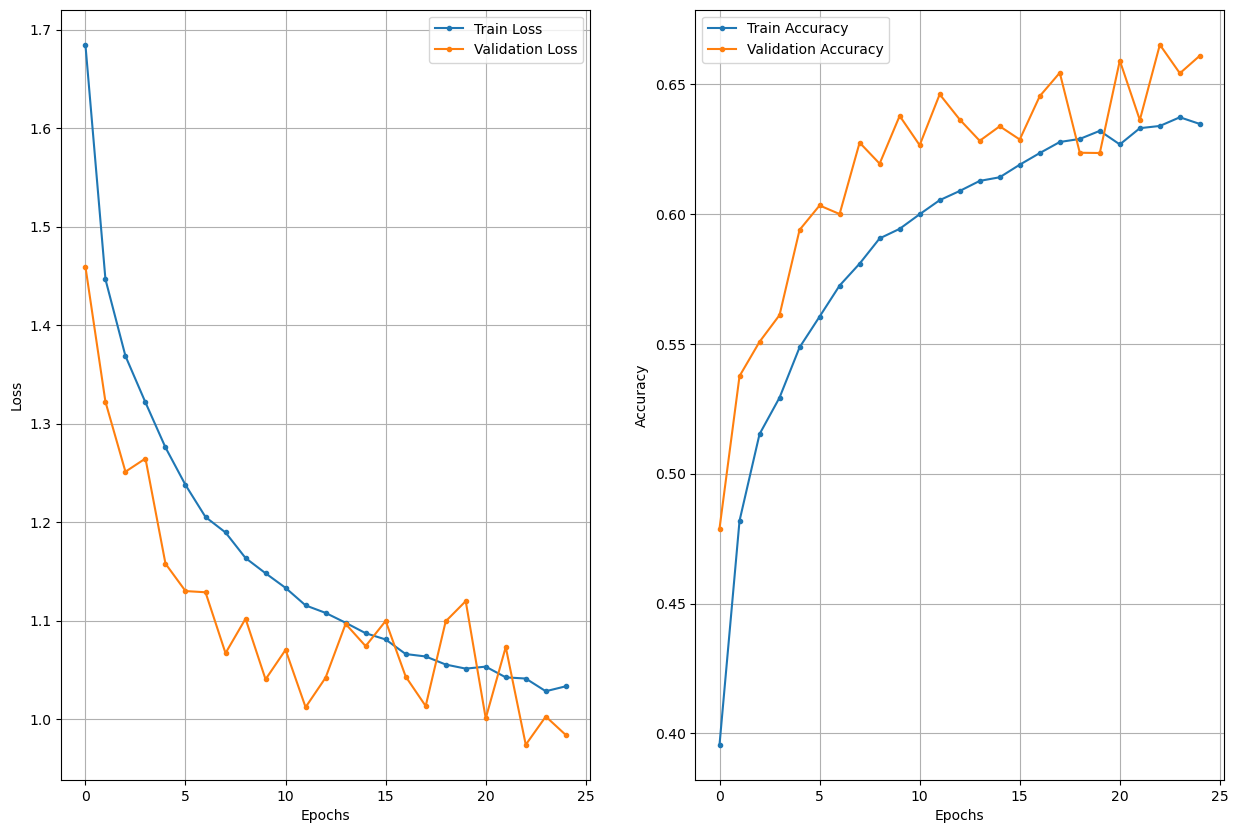

Final Train Accuracy      0.6346799731254578
Final Validation Accuracy 0.6610000133514404


In [52]:
h = history.history
epoch_range = range(len(h['loss']))

plt.subplot(121)
plt.plot(epoch_range, h['loss'], '.-', label='Train Loss')
plt.plot(epoch_range, h['val_loss'], '.-', label='Validation Loss')
plt.grid(True)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(122)
plt.plot(epoch_range, h['accuracy'], '.-', label='Train Accuracy')
plt.plot(epoch_range, h['val_accuracy'], '.-', label='Validation Accuracy')
plt.grid(True)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()
print('Final Train Accuracy     ', h['accuracy'][-1])
print('Final Validation Accuracy', h['val_accuracy'][-1])

In [54]:
y_true = np.argmax(y_test, axis=1)
y_pred_probs = model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [56]:
print("\nAccuracy for each class:")
for class_id, class_name in classes.items():
    indices = (y_true == class_id)
    acc = np.mean(y_pred[indices] == y_true[indices])
    print(class_name, acc)


Accuracy for each class:
plane 0.658
car 0.79
bird 0.437
cat 0.45
deer 0.612
dog 0.467
frog 0.901
horse 0.679
ship 0.771
truck 0.845


In [58]:
ev = model.evaluate(x_test, y_test)
print('\nTest loss     :', ev[0])
print('Test accuracy :', ev[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6640 - loss: 0.9742

Test loss     : 0.9839114546775818
Test accuracy : 0.6610000133514404


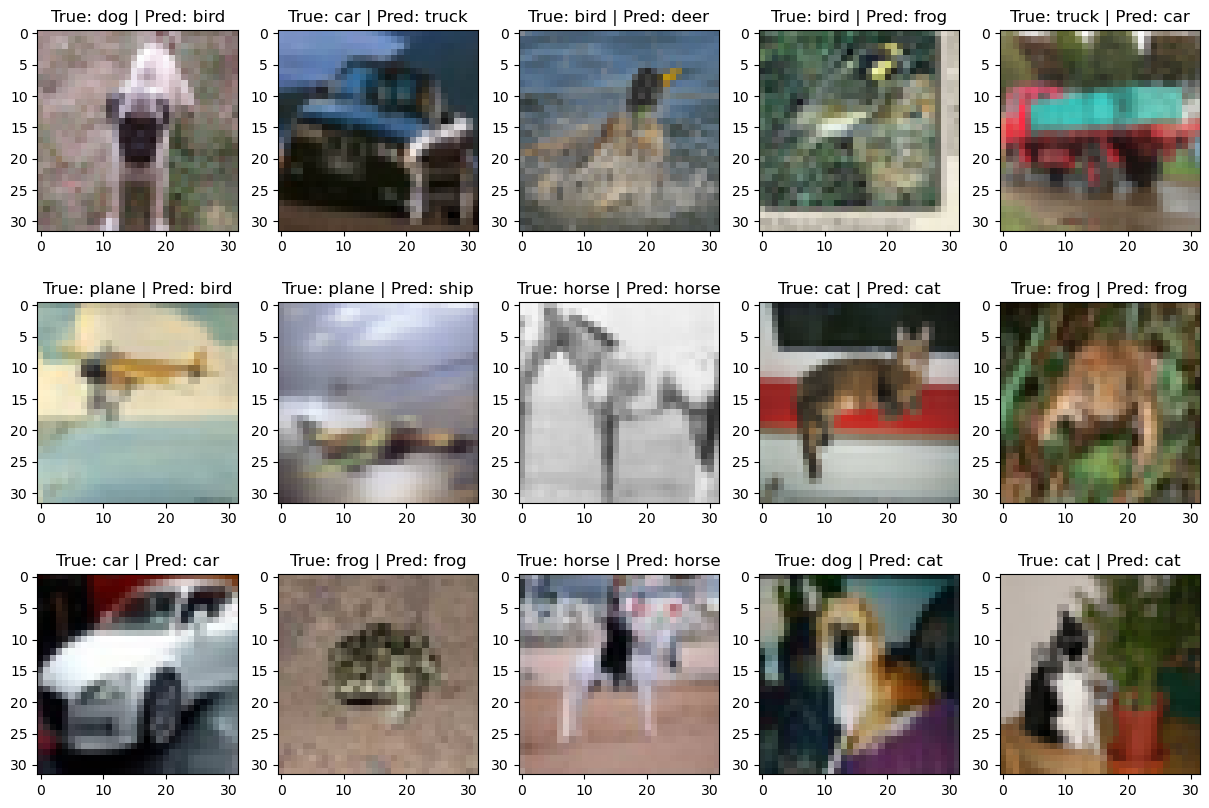

In [60]:
for ii in range(15):
    idx = np.random.randint(0, x_test.shape[0])
    plt.subplot(3,5,ii+1), plt.imshow(x_test[idx, ...])
    plt.title('True: ' + str(classes[y_true[idx]]) + ' | Pred: ' + str(classes[y_pred[idx]]))